In [1]:
# Import libraries 

# data wrangling
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# clustering 
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import RobustScaler 
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# filter wrangling
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# import libraries
import mysql.connector
from mysql.connector import Error

In [3]:
# define mysql details
host   = 'okegarden-laravel-prod-db-2024-11-15-0200.cgwhhgh85mr3.ap-southeast-3.rds.amazonaws.com'
port   = '3306'
user   = 'intern_mes'
passwd = 'sdfDFLES342982Ddlsdksd'
databs = 'okegarden_laravel_prod_db'

In [4]:
# function to fetch data from database, the connection is closed after use.
def fetch_data(host_name, port_name, user_name, user_password, db_name, query, params=None):
    try:
        # use with to ensure the connection is closed after use
        with mysql.connector.connect(
            host=host_name,
            port=port_name,
            user=user_name,
            password=user_password,
            database=db_name
        ) as connection:
            data = pd.read_sql(query, connection, params=params) # read the query to dataframe format
            return data

    except Error as e:
        print(f"Error while connecting to MySQL or fetching data: {e}")
        return None

### Table Order Garden Care Detail

In [5]:
# usage example (the mysql detail already defined)
# simple query
query_order_garden_care = """
SELECT
  order_garden_care_detail.id AS id,
  order_garden_care_detail.id_order_garden_care AS id_order_garden_care,
  order_garden_care_detail.status AS status,
  order_garden_care.id_user,
  order_garden_care.price,
  garden_care.care_count AS jumlah_perawatan,
  garden_care.manpower AS manpower_required,
  order_garden_care.address,
  CAST(address_components.latitude AS FLOAT) AS lat,
  CAST(address_components.longitude AS FLOAT) AS lng,
  order_garden_care.created_at AS order_date 
FROM
  order_garden_care_detail
  JOIN order_garden_care ON order_garden_care_detail.id_order_garden_care = order_garden_care.id
  LEFT JOIN garden_care ON garden_care.id = order_garden_care.id_garden_care
  JOIN address_components ON order_garden_care.id = address_components.address_componentable_id
  JOIN user ON order_garden_care.id_user = user.id_user
WHERE
  (
    order_garden_care_detail.maintenance_schedule IS NULL
  )
  AND (
    (order_garden_care_detail.status <> 'expired')
    OR (order_garden_care_detail.status IS NULL)
  )
  AND address_components.address_componentable_type LIKE '%OrderGardenCare'
GROUP BY
  order_garden_care_detail.id_order_garden_care,
  order_garden_care_detail.status,
  order_garden_care.id_user,
  garden_care.care_count,
  garden_care.manpower,
  order_garden_care.address,
  order_garden_care.price,
  address_components.latitude,
  address_components.longitude,
  order_garden_care.created_at

"""

In [6]:
# fetch data using function
df_ogc = fetch_data(host, port, user, passwd, databs, query_order_garden_care)

In [7]:
df_ogc

,id,id_order_garden_care,status,id_user,price,jumlah_perawatan,manpower_required,address,lat,lng,order_date
0,105,28,paid,1186,0.0,3,1,Semanggi,-6.22111,106.814,2024-07-02 10:18:44
1,598,88,paid,1268,0.0,12,2,"Jl Palem VI/35, Petukangan Utara, Jakarta Selatan",-6.22585,106.757,2024-07-04 11:54:30
2,626,103,paid,1329,1049500.0,6,1,"Jl. Canary Timur 2 No. 3 (The Springs, Cluster...",-6.26852,106.642,2024-07-25 14:33:54
3,632,104,paid,1353,1999500.0,12,1,Perumahan Graha Mirai Cluster Hikari Blok H No...,-6.38129,107.117,2024-07-26 09:17:45
4,648,105,paid,1356,1549500.0,6,2,"Jl Cisanggiri III No.18\r\nKebayoran Baru, Jak...",-6.24165,106.813,2024-07-27 14:07:02
...,...,...,...,...,...,...,...,...,...,...,...
96,1424,278,paid,1349,0.0,1,1,Nama Klien: Ruben onsu/ Sarwendah\nAlamat : Jl...,-6.28399,106.799,2024-11-10 17:25:39
97,1426,279,paid,1349,0.0,12,1,DKI Jakarta,-6.19445,106.823,2024-11-10 17:30:09
98,1449,287,paid,1937,0.0,12,1,"alia residence, jln. alia 6 no. 22 Jatimelati ...",-6.31348,106.937,2024-11-12 11:22:32
99,1473,289,paid,1451,0.0,6,1,Cluster nara village Jalan boulevard no.17,-6.16404,106.903,2024-11-12 14:25:56


In [8]:
# order_garden_care_detail info
df_ogc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    101 non-null    int64         
 1   id_order_garden_care  101 non-null    int64         
 2   status                101 non-null    object        
 3   id_user               101 non-null    int64         
 4   price                 101 non-null    float64       
 5   jumlah_perawatan      101 non-null    int64         
 6   manpower_required     101 non-null    int64         
 7   address               101 non-null    object        
 8   lat                   101 non-null    float64       
 9   lng                   101 non-null    float64       
 10  order_date            101 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(5), object(2)
memory usage: 8.8+ KB


In [9]:
# show order_garden_care_detail
df_ogc.head()

,id,id_order_garden_care,status,id_user,price,jumlah_perawatan,manpower_required,address,lat,lng,order_date
0,105,28,paid,1186,0.0,3,1,Semanggi,-6.22111,106.814,2024-07-02 10:18:44
1,598,88,paid,1268,0.0,12,2,"Jl Palem VI/35, Petukangan Utara, Jakarta Selatan",-6.22585,106.757,2024-07-04 11:54:30
2,626,103,paid,1329,1049500.0,6,1,"Jl. Canary Timur 2 No. 3 (The Springs, Cluster...",-6.26852,106.642,2024-07-25 14:33:54
3,632,104,paid,1353,1999500.0,12,1,Perumahan Graha Mirai Cluster Hikari Blok H No...,-6.38129,107.117,2024-07-26 09:17:45
4,648,105,paid,1356,1549500.0,6,2,"Jl Cisanggiri III No.18\r\nKebayoran Baru, Jak...",-6.24165,106.813,2024-07-27 14:07:02


### Table Order Garden

In [101]:
# usage example (the mysql detail already defined)
# simple query
query_order_garden = """
SELECT
  order_garden.id_order AS id_order_garden,
  order_garden.id_user,
  order_garden.id_gardener,
  order_garden.status AS status_garden,
  order_garden.size_area,
  order_garden.address,
  CAST(address_components.latitude AS FLOAT) AS lat,
  CAST(address_components.longitude AS FLOAT) AS lng,
  order_garden.created_at AS order_date
FROM
  order_garden
  JOIN address_components ON order_garden.id_order = address_components.address_componentable_id
  JOIN user ON order_garden.id_user = user.id_user
  JOIN design on design.id_design = order_garden.id_design_finish
WHERE
   (
    (order_garden.status <> 'expired')
    OR (order_garden.status IS NULL)
  ) AND address_components.address_componentable_type LIKE '%OrderGarden'
GROUP BY
  order_garden.id_order,
  order_garden.status,
  order_garden.id_user,
  order_garden.id_gardener,
  order_garden.size_area,
  order_garden.address,
  address_components.latitude,
  address_components.longitude,
  order_garden.created_at

"""

In [102]:
# fetch data using function
df_og = fetch_data(host, port, user, passwd, databs, query_order_garden)

In [103]:
df_og

,id_order_garden,id_user,id_gardener,status_garden,size_area,address,lat,lng,order_date
0,65,927,1087.0,in_review,11.0,Jl. Ujung Gedong RT 002 RW 012 no.69 Kel. Gedo...,-6.29776,106.862,2024-04-23 16:05:27
1,66,926,1093.0,in_review,28.0,"Mahagoni Park Bintaro Blok B1 No 50, Perigi Ba...",-6.26076,106.690,2024-04-27 12:19:36
2,70,925,1085.0,finish,35.0,"Premier Terrace Blok M3, Jalan Raya Ciracas, C...",-6.32984,106.876,2024-05-16 17:59:26
3,72,1024,1087.0,finish,2.0,"Bekasi, Kota Bekasi, Jawa Barat",-6.23827,106.976,2024-05-24 06:24:44
4,74,1052,1087.0,finish,5.0,"Wakay Residences, no A7, Jl. Abdulrahman, RT.1...",-6.36347,106.880,2024-06-12 08:40:53
...,...,...,...,...,...,...,...,...,...
87,191,1607,1093.0,finish,8.0,cluster Alicante Granada blok ABB no.27 Gading...,-6.29943,106.668,2024-10-28 07:37:28
88,192,1727,1092.0,acc_gardener,8.0,"Jl. Darmawangsa X No. 69A, Kebayoran Baru, Jak...",-6.25731,106.804,2024-10-28 17:04:03
89,194,1727,1092.0,finish,10.0,"Jl. Darmawangsa X No. 69A, Kebayoran Baru, Jak...",-6.25731,106.804,2024-11-01 20:08:05
90,195,1865,1087.0,finish,21.0,Jl. Golf Boulevard GBV no 25 kemayoran \r\nJak...,-6.14752,106.850,2024-11-01 20:20:59


In [13]:
# info order_garden
df_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id_order_garden  92 non-null     int64         
 1   id_user          92 non-null     int64         
 2   id_gardener      88 non-null     float64       
 3   status_garden    92 non-null     object        
 4   size_area        92 non-null     float64       
 5   address          92 non-null     object        
 6   lat              92 non-null     float64       
 7   lng              92 non-null     float64       
 8   order_date       92 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 6.6+ KB


In [14]:
# show order_garden
df_og.head()

,id_order_garden,id_user,id_gardener,status_garden,size_area,address,lat,lng,order_date
0,65,927,1087.0,in_review,11.0,Jl. Ujung Gedong RT 002 RW 012 no.69 Kel. Gedo...,-6.29776,106.862,2024-04-23 16:05:27
1,66,926,1093.0,in_review,28.0,"Mahagoni Park Bintaro Blok B1 No 50, Perigi Ba...",-6.26076,106.690,2024-04-27 12:19:36
2,70,925,1085.0,finish,35.0,"Premier Terrace Blok M3, Jalan Raya Ciracas, C...",-6.32984,106.876,2024-05-16 17:59:26
3,72,1024,1087.0,finish,2.0,"Bekasi, Kota Bekasi, Jawa Barat",-6.23827,106.976,2024-05-24 06:24:44
4,74,1052,1087.0,finish,5.0,"Wakay Residences, no A7, Jl. Abdulrahman, RT.1...",-6.36347,106.880,2024-06-12 08:40:53


### Table Order Design

In [96]:
# usage example (the mysql detail already defined)
# simple query
query_order_design = """
SELECT
  order_design.id_order AS id_order_design,
  order_design.id_user,
  order_design.id_designer,
  order_design.status AS status_design,
  order_design.address,
  CAST(address_components.latitude AS FLOAT) AS lat,
  CAST(address_components.longitude AS FLOAT) AS lng,
  order_design.created_at AS order_date
FROM
  order_design 
  LEFT JOIN detail_order_design ON detail_order_design.id_order = order_design.id_order
  LEFT JOIN address_components ON order_design.id_order = address_components.address_componentable_id
  LEFT JOIN user ON order_design.id_user = user.id_user
WHERE
   (
    (order_design.status <> 'expired')
    OR (order_design.status IS NULL)
    OR (order_design.id_design_finish IS NULL)
  ) AND address_components.address_componentable_type LIKE '%OrderDesign'
GROUP BY
  order_design.id_order,
  order_design.id_user,
  order_design.id_designer,
  order_design.address,
  order_design.status,
  address_components.latitude,
  address_components.longitude,
  order_design.created_at


"""

In [97]:
# fetch data using function
df_od = fetch_data(host, port, user, passwd, databs, query_order_design)

In [17]:
df_od

,id_order_design,id_user,id_designer,status_design,address,lat,lng,order_date
0,568,921,949.0,in_review,"Emerald View, Jln. Emerald Citra V, Blok D no....",-6.28352,106.7110,2024-04-20 15:28:15
1,569,923,950.0,in_review,"Perumahan Jatinegara Indah, Jl Lawu Ujung Blok...",-6.19922,106.9270,2024-04-21 10:30:22
2,570,925,943.0,finish,"Premier Terrace Blok M3, Jalan Raya Ciracas, C...",-6.32984,106.8760,2024-04-21 16:00:33
3,571,926,946.0,in_review,"Mahagoni Park Bintaro Blok B1 No 50, Perigi Ba...",-6.26076,106.6900,2024-04-22 10:25:36
4,572,927,928.0,finish,Jl. Ujung Gedong RT 002 RW 012 no.69 Kel. Gedo...,-6.29776,106.8620,2024-04-22 11:41:42
...,...,...,...,...,...,...,...,...
226,914,1686,982.0,finish,"Jl. Rambutan No.12A CONDET, Kel. Cililitan, Ke...",-6.25960,106.8690,2024-09-21 09:44:30
227,915,1485,948.0,on_going,"Madirsan,tanjung Morawa, Kabupaten Deli Serdan...",3.53093,98.7633,2024-09-21 16:23:20
228,916,1485,NaN,on_going,"Madirsan,tanjung Morawa, Kabupaten Deli Serdan...",3.53093,98.7633,2024-09-21 16:23:20
229,917,1485,NaN,on_going,"Madirsan,tanjung Morawa, Kabupaten Deli Serdan...",3.53093,98.7633,2024-09-21 16:23:20


In [18]:
# info order design
df_od.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id_order_design  231 non-null    int64         
 1   id_user          231 non-null    int64         
 2   id_designer      185 non-null    float64       
 3   status_design    231 non-null    object        
 4   address          231 non-null    object        
 5   lat              231 non-null    float64       
 6   lng              231 non-null    float64       
 7   order_date       231 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 14.6+ KB


In [19]:
# show order design 
df_od.head()

,id_order_design,id_user,id_designer,status_design,address,lat,lng,order_date
0,568,921,949.0,in_review,"Emerald View, Jln. Emerald Citra V, Blok D no....",-6.28352,106.711,2024-04-20 15:28:15
1,569,923,950.0,in_review,"Perumahan Jatinegara Indah, Jl Lawu Ujung Blok...",-6.19922,106.927,2024-04-21 10:30:22
2,570,925,943.0,finish,"Premier Terrace Blok M3, Jalan Raya Ciracas, C...",-6.32984,106.876,2024-04-21 16:00:33
3,571,926,946.0,in_review,"Mahagoni Park Bintaro Blok B1 No 50, Perigi Ba...",-6.26076,106.690,2024-04-22 10:25:36
4,572,927,928.0,finish,Jl. Ujung Gedong RT 002 RW 012 no.69 Kel. Gedo...,-6.29776,106.862,2024-04-22 11:41:42


In [20]:
# shape order garden care
df_ogc.shape

(101, 11)

In [21]:
# shape order garden
df_og.shape

(92, 9)

In [22]:
# shape order design
df_od.shape

(231, 8)

In [23]:
# check duplicated
df_ogc.duplicated().sum()

0

In [24]:
# check duplicated
df_og.duplicated().sum()

0

In [25]:
# check duplicated
df_od.duplicated().sum()

0

In [26]:
df_ogc_new = pd.DataFrame(df_ogc)

# ID yang ingin dihapus
ids_to_remove = [921, 699, 969, 981, 1025, 1256, 1302]

# Menghapus baris dengan ID tertentu
df_ogc_new = df_ogc_new[~df_ogc_new['id'].isin(ids_to_remove)]


In [27]:
df_og_new = pd.DataFrame(df_og)

# ID yang ingin dihapus
ids_to_remove = [167, 110, 150, 113]

# Menghapus baris dengan ID tertentu
df_og_new = df_og_new[~df_og_new['id_order_garden'].isin(ids_to_remove)]


In [28]:
df_od_new = pd.DataFrame(df_od)

# ID yang ingin dihapus
ids_to_remove = [887, 617, 696, 892,  893]

# Menghapus baris dengan ID tertentu
df_od_new = df_od_new[~df_od_new['id_order_design'].isin(ids_to_remove)]


### Missing Values Order Garden Care, Order Garden, Order Design

In [29]:
# check missing values 
df_ogc_new.isna().sum()

id                      0
id_order_garden_care    0
status                  0
id_user                 0
price                   0
jumlah_perawatan        0
manpower_required       0
address                 0
lat                     0
lng                     0
order_date              0
dtype: int64

In [30]:
# check missing values 
df_og_new.isna().sum()

id_order_garden    0
id_user            0
id_gardener        3
status_garden      0
size_area          0
address            0
lat                0
lng                0
order_date         0
dtype: int64

In [31]:
# check missing values 
df_od_new.isna().sum()

id_order_design     0
id_user             0
id_designer        44
status_design       0
address             0
lat                 0
lng                 0
order_date          0
dtype: int64

#### Pada informasi diatas tabel `order garden care detail ` tidak memiliki null values, `order garden` memiliki 4 null values pada kolom id_gardener, `order design` memiliki null values 44 pada kolom id_designer

In [32]:
# dropping values using dropna 
df_ogc_clean = df_ogc_new.dropna()

In [33]:
# dropping values using dropna 
df_og_clean = df_og_new.dropna()

In [34]:
# dropping values using dropna 
df_od_clean = df_od_new.dropna()

In [35]:
# split numeric and object data 
df_ogc_num = df_ogc_clean.select_dtypes(include=['int64', 'float64'])
df_og_num = df_og_clean.select_dtypes(include=['int64', 'float64'])
df_od_num = df_od_clean.select_dtypes(include=['int64', 'float64'])

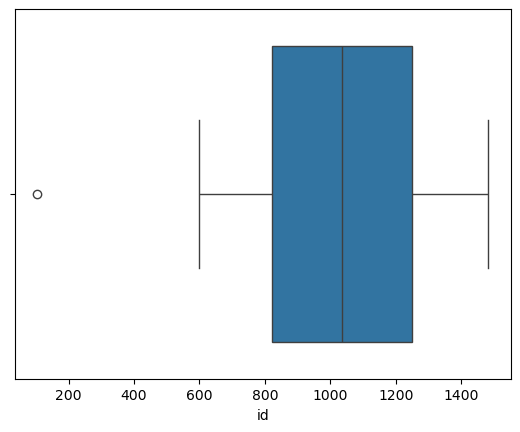

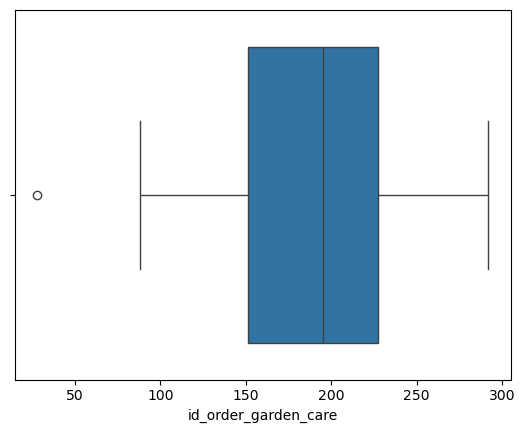

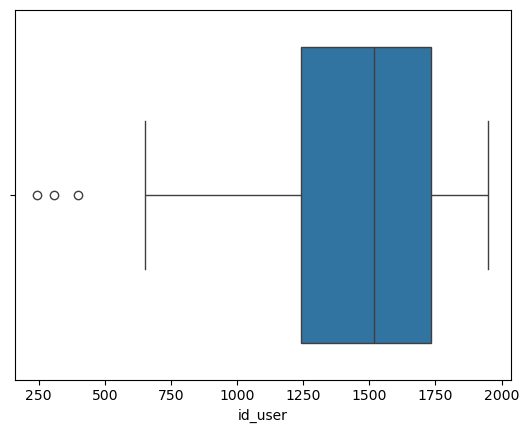

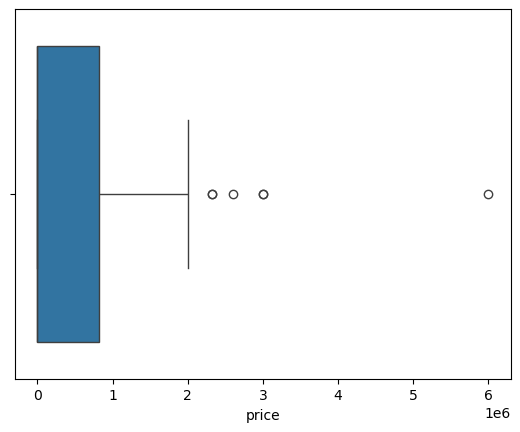

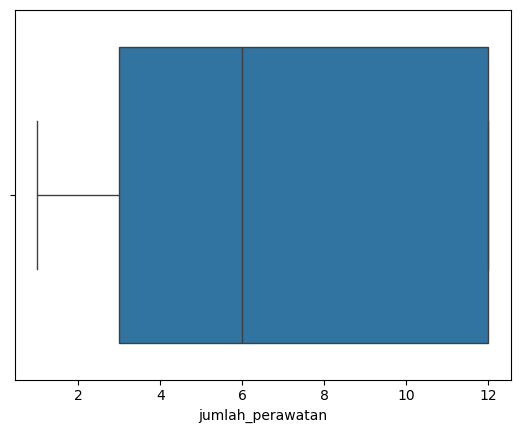

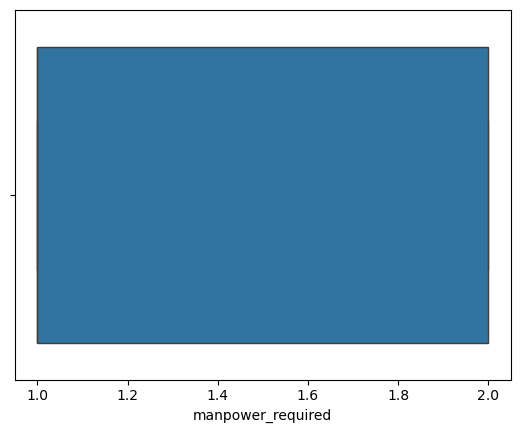

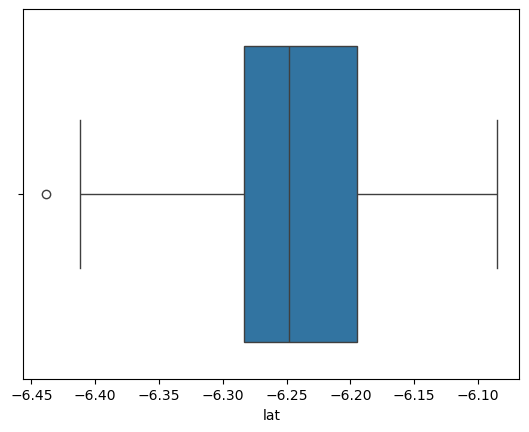

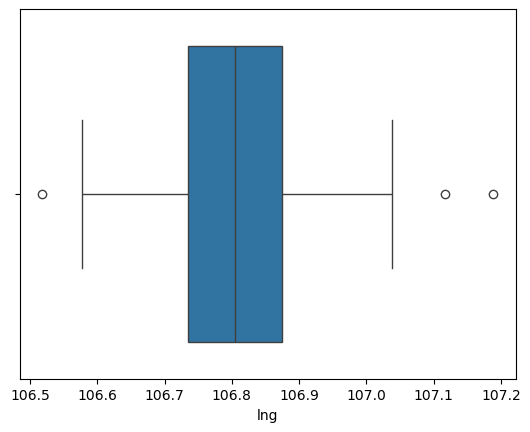

In [36]:
# detecting using boxplot on each column (multiple) -> outliers hanya numerical
for i in df_ogc_num:
    sns.boxplot(data = df_ogc_num, x = i)
    plt.show()

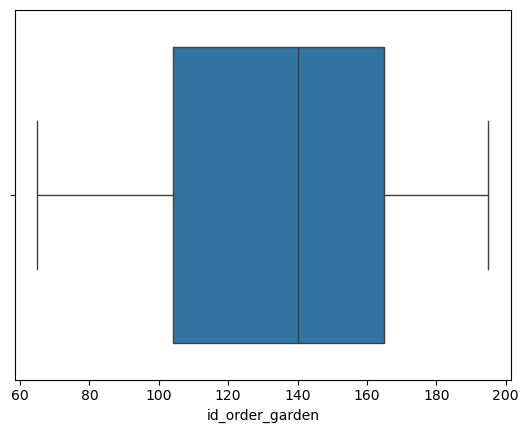

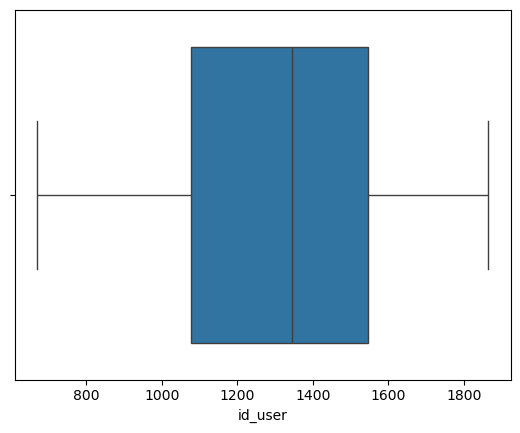

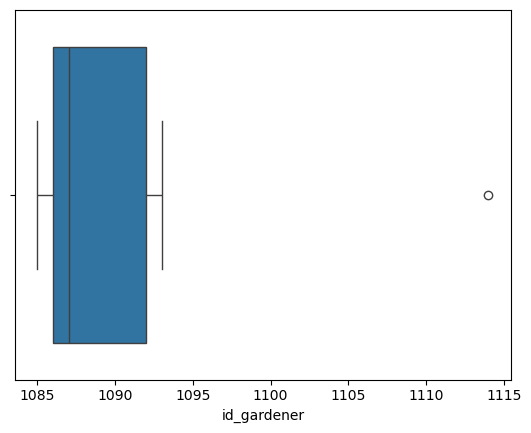

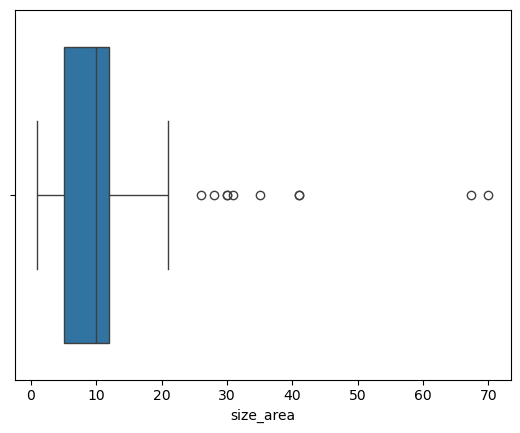

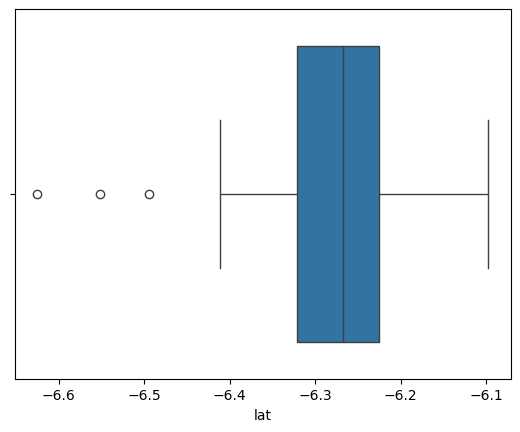

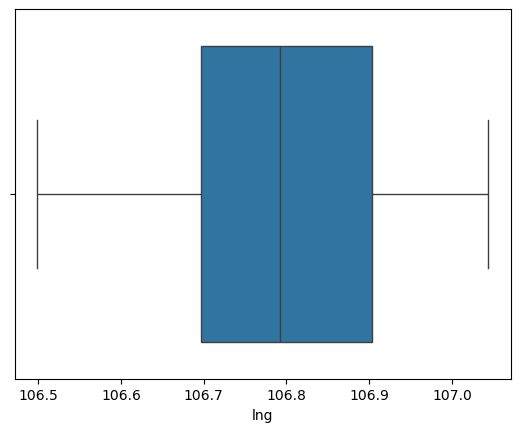

In [37]:
# detecting using boxplot on each column (multiple) -> outliers hanya numerical
for i in df_og_num:
    sns.boxplot(data = df_og_num, x = i)
    plt.show()

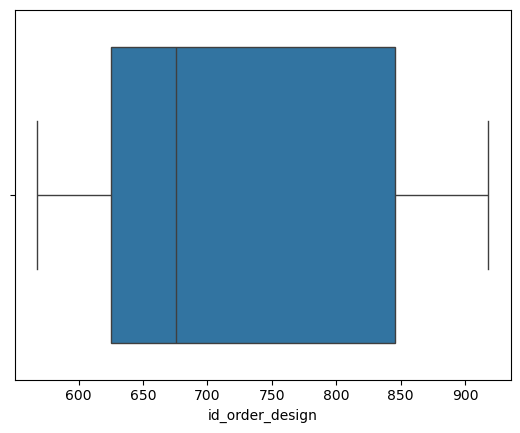

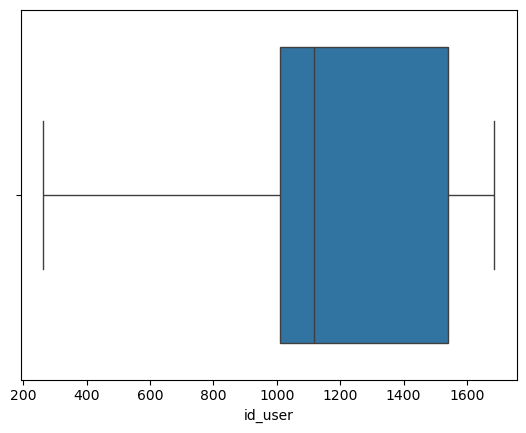

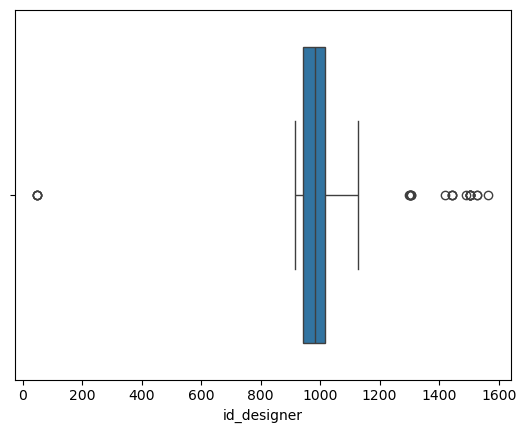

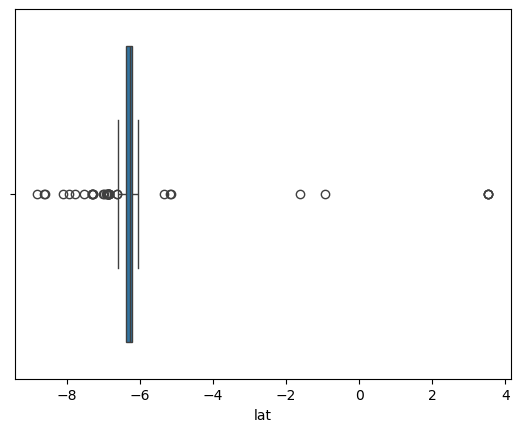

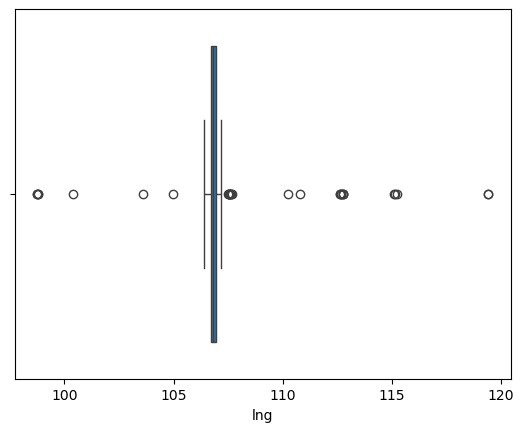

In [38]:
# detecting using boxplot on each column (multiple) -> outliers hanya numerical
for i in df_od_num:
    sns.boxplot(data = df_od_num, x = i)
    plt.show()

In [39]:
# function to find outliers, using numpy 
def find_outlier(data):
    Q1 = np.quantile(data, .25)
    Q2 = np.quantile(data, .50) # median
    Q3 = np.quantile(data, .75)

    # find IQR
    IQR = (Q3 - Q1) * 1.5 
    lower_limit = Q1 - IQR 
    upper_limit = Q3 + IQR 

    # find outliers
    outliers = ''
    for i in range(len(data)): 
        if data[i] > upper_limit: 
            outliers = outliers + str(data[i]) + ', '
            
        elif data[i] < lower_limit: 
            outliers = outliers + str(data[i]) + ', '
            
    return outliers

In [40]:
# detect outliers from each columns using loop 
for i in df_ogc_num: 
    val = df_ogc_num[i].sort_values().values.tolist()
    outliers = find_outlier(val)
    outlier_count = len(outliers)
    outlier_percent = (outlier_count / len(val)) * 100
    print(f"Outliers detected in '{i}': {outlier_count} ({outlier_percent:.2f}%)")

Outliers detected in 'id': 5 (5.32%)
Outliers detected in 'id_order_garden_care': 4 (4.26%)
Outliers detected in 'id_user': 15 (15.96%)
Outliers detected in 'price': 66 (70.21%)
Outliers detected in 'jumlah_perawatan': 0 (0.00%)
Outliers detected in 'manpower_required': 0 (0.00%)
Outliers detected in 'lat': 10 (10.64%)
Outliers detected in 'lng': 27 (28.72%)


In [41]:
# detect outliers from each columns using loop 
for i in df_og_num: 
    val = df_og_num[i].sort_values().values.tolist()
    outliers = find_outlier(val)
    outlier_count = len(outliers)
    outlier_percent = (outlier_count / len(val)) * 100
    print(f"Outliers detected in '{i}': {outlier_count} ({outlier_percent:.2f}%)")

Outliers detected in 'id_order_garden': 0 (0.00%)
Outliers detected in 'id_user': 0 (0.00%)
Outliers detected in 'id_gardener': 8 (9.41%)
Outliers detected in 'size_area': 60 (70.59%)
Outliers detected in 'lat': 30 (35.29%)
Outliers detected in 'lng': 0 (0.00%)


In [42]:
# detect outliers from each columns using loop 
for i in df_od_num: 
    val = df_od_num[i].sort_values().values.tolist()
    outliers = find_outlier(val)
    outlier_count = len(outliers)
    outlier_percent = (outlier_count / len(val)) * 100
    print(f"Outliers detected in '{i}': {outlier_count} ({outlier_percent:.2f}%)")

Outliers detected in 'id_order_design': 0 (0.00%)
Outliers detected in 'id_user': 0 (0.00%)
Outliers detected in 'id_designer': 184 (101.10%)
Outliers detected in 'lat': 356 (195.60%)
Outliers detected in 'lng': 279 (153.30%)


outlier ini taidak dihapus, karena terlalu banyak, dan ini akan digunakan

In [43]:
df_ogc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    94 non-null     int64         
 1   id_order_garden_care  94 non-null     int64         
 2   status                94 non-null     object        
 3   id_user               94 non-null     int64         
 4   price                 94 non-null     float64       
 5   jumlah_perawatan      94 non-null     int64         
 6   manpower_required     94 non-null     int64         
 7   address               94 non-null     object        
 8   lat                   94 non-null     float64       
 9   lng                   94 non-null     float64       
 10  order_date            94 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(5), object(2)
memory usage: 8.8+ KB


In [44]:
df_og_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 0 to 90
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id_order_garden  85 non-null     int64         
 1   id_user          85 non-null     int64         
 2   id_gardener      85 non-null     float64       
 3   status_garden    85 non-null     object        
 4   size_area        85 non-null     float64       
 5   address          85 non-null     object        
 6   lat              85 non-null     float64       
 7   lng              85 non-null     float64       
 8   order_date       85 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 6.6+ KB


In [45]:
df_od_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 0 to 230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id_order_design  182 non-null    int64         
 1   id_user          182 non-null    int64         
 2   id_designer      182 non-null    float64       
 3   status_design    182 non-null    object        
 4   address          182 non-null    object        
 5   lat              182 non-null    float64       
 6   lng              182 non-null    float64       
 7   order_date       182 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 12.8+ KB


### Find Optimal K Using Elbow Method

### Clustering Order Garden Care

In [46]:
# Normalisasi data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_ogc_clean[["lat","lng"]])
# find k 
k = range(1, 10)
inertia = []

for i in k: 
    model = KMeans(n_clusters=i, random_state=42 )
    model.fit(scaled_features)
    inertia.append(model.inertia_)

In [47]:
# print inertia
print(inertia)

[188.00000000000003, 132.3081212435126, 78.13685786820817, 58.7053265948956, 54.13422640849154, 41.00943395012829, 36.44935209893243, 28.622751967610778, 25.14300326961963]


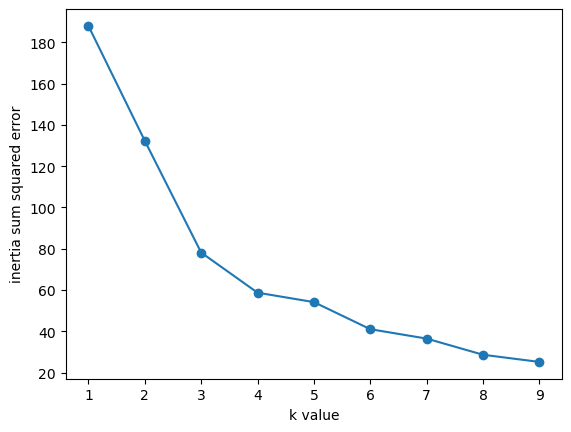

In [48]:
# plot the elbow 
plt.plot(k, inertia, "o-")
plt.xlabel("k value")
plt.ylabel('inertia sum squared error')
plt.show()

In [49]:
# fit kmeans model 
model = KMeans(n_clusters=7 , max_iter= 1000, random_state=42)
model.fit(scaled_features)

KMeans(max_iter=1000, n_clusters=7, random_state=42)

In [50]:
# predict clusters 
df_ogc_clean['cluster'] = model.predict(scaled_features)
df_ogc_clean.head()

,id,id_order_garden_care,status,id_user,price,jumlah_perawatan,manpower_required,address,lat,lng,order_date,cluster
0,105,28,paid,1186,0.0,3,1,Semanggi,-6.22111,106.814,2024-07-02 10:18:44,0
1,598,88,paid,1268,0.0,12,2,"Jl Palem VI/35, Petukangan Utara, Jakarta Selatan",-6.22585,106.757,2024-07-04 11:54:30,1
2,626,103,paid,1329,1049500.0,6,1,"Jl. Canary Timur 2 No. 3 (The Springs, Cluster...",-6.26852,106.642,2024-07-25 14:33:54,3
3,632,104,paid,1353,1999500.0,12,1,Perumahan Graha Mirai Cluster Hikari Blok H No...,-6.38129,107.117,2024-07-26 09:17:45,2
4,648,105,paid,1356,1549500.0,6,2,"Jl Cisanggiri III No.18\r\nKebayoran Baru, Jak...",-6.24165,106.813,2024-07-27 14:07:02,1


In [51]:
# counts each clusters 
df_ogc_clean['cluster'].value_counts()

cluster
0    29
1    25
3    13
5    10
4     8
6     7
2     2
Name: count, dtype: int64

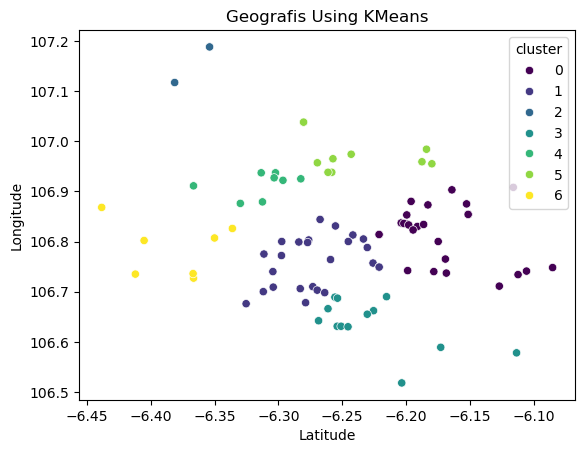

In [52]:
# visualisasi cluster order garden care 
sns.scatterplot(data=df_ogc_clean,x='lat',y='lng',hue='cluster', palette='viridis')
plt.title("Geografis Using KMeans")
plt.xlabel('Latitude') # xlabel
plt.ylabel('Longitude') # y label
plt.show()

### Clustering Order Garden

In [53]:
# Normalisasi data
scaler = StandardScaler()
scaled_og = scaler.fit_transform(df_og_clean[["lat","lng"]])
# find l
l = range(1, 10)
inertia = []

for i in l: 
    model = KMeans(n_clusters=i, random_state=42 )
    model.fit(scaled_og)
    inertia.append(model.inertia_)

In [54]:
# print inertia
print(inertia)

[170.0, 110.43603980318238, 66.09899234904317, 53.43588946969419, 44.001757669255035, 37.57193065011684, 25.58695564083075, 22.18062179969965, 20.523017936201946]


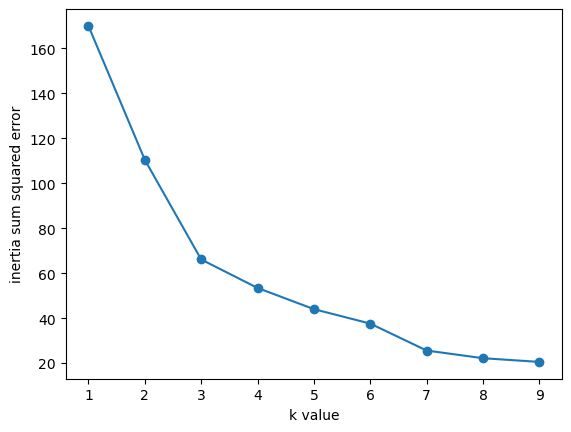

In [55]:
# plot the elbow 
plt.plot(l, inertia, "o-")
plt.xlabel("k value")
plt.ylabel('inertia sum squared error')
plt.show()

In [56]:
# fit kmeans model 
model = KMeans(n_clusters= 6, max_iter= 1000, random_state=42)
model.fit(scaled_og)

KMeans(max_iter=1000, n_clusters=6, random_state=42)

In [57]:
# predict clusters 
df_og_clean['cluster'] = model.predict(scaled_og)
df_og_clean.head()

,id_order_garden,id_user,id_gardener,status_garden,size_area,address,lat,lng,order_date,cluster
0,65,927,1087.0,in_review,11.0,Jl. Ujung Gedong RT 002 RW 012 no.69 Kel. Gedo...,-6.29776,106.862,2024-04-23 16:05:27,5
1,66,926,1093.0,in_review,28.0,"Mahagoni Park Bintaro Blok B1 No 50, Perigi Ba...",-6.26076,106.690,2024-04-27 12:19:36,4
2,70,925,1085.0,finish,35.0,"Premier Terrace Blok M3, Jalan Raya Ciracas, C...",-6.32984,106.876,2024-05-16 17:59:26,5
3,72,1024,1087.0,finish,2.0,"Bekasi, Kota Bekasi, Jawa Barat",-6.23827,106.976,2024-05-24 06:24:44,5
4,74,1052,1087.0,finish,5.0,"Wakay Residences, no A7, Jl. Abdulrahman, RT.1...",-6.36347,106.880,2024-06-12 08:40:53,2


In [58]:
# counts each clusters 
df_og_clean['cluster'].value_counts()

cluster
4    20
2    17
5    16
3    14
0    11
1     7
Name: count, dtype: int64

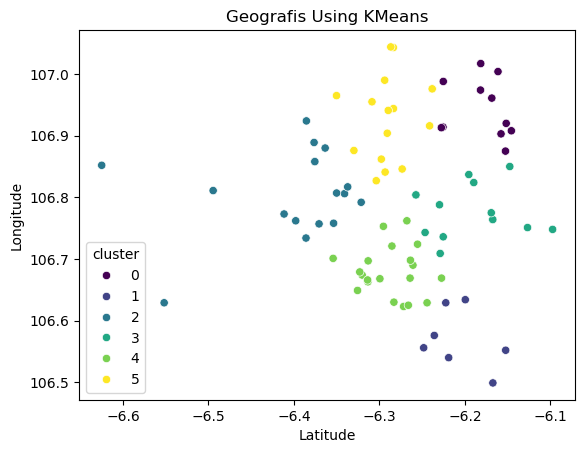

In [59]:
# visualisation clustering order garden
sns.scatterplot(data=df_og_clean,x='lat',y='lng',hue='cluster', palette='viridis')
plt.title("Geografis Using KMeans")
plt.xlabel('Latitude') # xlabel
plt.ylabel('Longitude') # y label
plt.show()

### Clustering Order Design

In [60]:
# Normalisasi data
scaler = StandardScaler()
scaled_od = scaler.fit_transform(df_od_clean[["lat","lng"]])
# find m 
m = range(1, 10)
inertia = []

for i in l: 
    model = KMeans(n_clusters=i, random_state=42 )
    model.fit(scaled_od)
    inertia.append(model.inertia_)

In [61]:
# print inertia
print(inertia)

[364.0000000000001, 154.49333671876943, 43.79476255392633, 28.094974106611293, 16.48115679604329, 15.535284598360557, 6.2623555634075, 3.441142996182946, 2.4899769611345635]


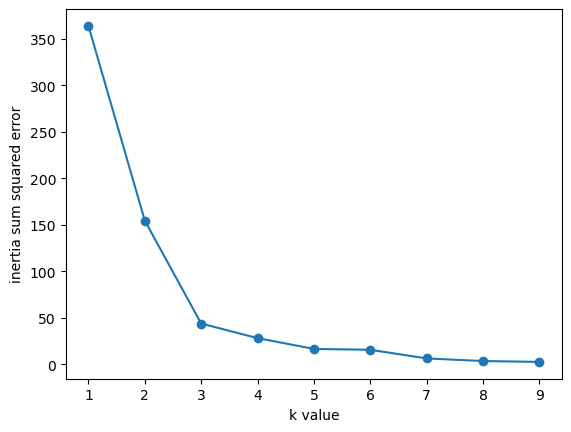

In [62]:
# plot the elbow 
plt.plot(m, inertia, "o-")
plt.xlabel("k value")
plt.ylabel('inertia sum squared error')
plt.show()

In [63]:
# fit kmeans model 
model = KMeans(n_clusters= 4, max_iter= 1000, random_state=42)
model.fit(scaled_od)

KMeans(max_iter=1000, n_clusters=4, random_state=42)

In [64]:
# predict clusters 
df_od_clean['cluster'] = model.predict(scaled_od)
df_od_clean.head()

,id_order_design,id_user,id_designer,status_design,address,lat,lng,order_date,cluster
0,568,921,949.0,in_review,"Emerald View, Jln. Emerald Citra V, Blok D no....",-6.28352,106.711,2024-04-20 15:28:15,0
1,569,923,950.0,in_review,"Perumahan Jatinegara Indah, Jl Lawu Ujung Blok...",-6.19922,106.927,2024-04-21 10:30:22,0
2,570,925,943.0,finish,"Premier Terrace Blok M3, Jalan Raya Ciracas, C...",-6.32984,106.876,2024-04-21 16:00:33,0
3,571,926,946.0,in_review,"Mahagoni Park Bintaro Blok B1 No 50, Perigi Ba...",-6.26076,106.690,2024-04-22 10:25:36,0
4,572,927,928.0,finish,Jl. Ujung Gedong RT 002 RW 012 no.69 Kel. Gedo...,-6.29776,106.862,2024-04-22 11:41:42,0


In [65]:
# counts each clusters 
df_od_clean['cluster'].value_counts()

cluster
0    162
2     14
1      4
3      2
Name: count, dtype: int64

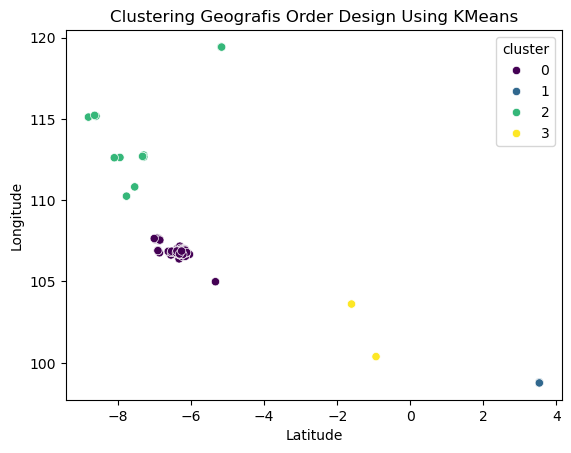

In [66]:
# visualisasi clustering oreder design
sns.scatterplot(data=df_od_clean,x='lat',y='lng',hue='cluster', palette='viridis')
plt.title("Clustering Geografis Order Design Using KMeans")
plt.xlabel('Latitude') # xlabel
plt.ylabel('Longitude') # y label
plt.show()

In [67]:
df_od_clean[df_od_clean['cluster'] == 1]

,id_order_design,id_user,id_designer,status_design,address,lat,lng,order_date,cluster
133,809,263,1302.0,in_review,"Tanjung Morawa, Kabupaten Deli Serdang, Sumate...",3.52998,98.8078,2024-08-14 14:35:26,1
134,810,263,1127.0,in_review,"Tanjung Morawa, Kabupaten Deli Serdang, Sumate...",3.52998,98.8078,2024-08-14 14:45:13,1
227,915,1485,948.0,on_going,"Madirsan,tanjung Morawa, Kabupaten Deli Serdan...",3.53093,98.7633,2024-09-21 16:23:20,1
230,918,1485,931.0,in_review_internal,"Madirsan,tanjung Morawa, Kabupaten Deli Serdan...",3.53093,98.7633,2024-09-23 08:53:49,1


# Analisis Order Garden Care

### Analisis order garden care

In [68]:
# show descriptive stats on numerical 
df_ogc_clean.describe().round(2).T

,count,mean,min,25%,50%,75%,max,std
id,94.0,1030.38,105.0,820.25,1035.0,1250.0,1482.0,267.06
id_order_garden_care,94.0,189.93,28.0,151.25,195.5,227.25,292.0,55.25
id_user,94.0,1470.21,245.0,1240.0,1519.0,1733.0,1950.0,338.25
price,94.0,522963.56,0.0,0.0,0.0,824250.0,5999000.0,971133.15
jumlah_perawatan,94.0,7.15,1.0,3.0,6.0,12.0,12.0,3.98
manpower_required,94.0,1.3,1.0,1.0,1.0,2.0,2.0,0.46
lat,94.0,-6.24,-6.44,-6.28,-6.25,-6.19,-6.09,0.07
lng,94.0,106.81,106.52,106.73,106.8,106.87,107.19,0.12
order_date,94,2024-09-21 23:17:03.797872128,2024-07-02 10:18:44,2024-09-05 13:20:59.249999872,2024-09-29 12:33:39,2024-10-12 10:49:01.500000,2024-11-13 14:56:42,NaN
cluster,94.0,2.04,0.0,0.0,1.0,4.0,6.0,2.04


In [69]:
df_ogc_copy = df_ogc_clean.copy()

In [70]:
from IPython.display import display
import folium

# Membuat peta pusat (gunakan rata-rata koordinat untuk pusat)
center_lat = df_ogc_copy['lat'].mean()
center_lon = df_ogc_copy['lng'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

# Buat daftar warna untuk cluster
cluster_colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightblue', 'lightgreen']
color_mapping = {}  # Dictionary untuk menyimpan warna per cluster

# Loop untuk mengatur warna unik setiap cluster
unique_clusters = df_ogc_copy['cluster'].unique()
for i, cluster in enumerate(unique_clusters):
    color_mapping[cluster] = cluster_colors[i % len(cluster_colors)]  # Gunakan warna secara berulang jika cluster lebih banyak dari warna

# Menambahkan marker per cluster
for _, row in df_ogc_copy.iterrows():
    cluster = row['cluster']
    color = color_mapping.get(cluster, 'gray')  # Gunakan warna default jika cluster tidak dikenal

    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=f"Cluster: {row['cluster']}<br>Address: {row['address']}",
        icon=folium.Icon(color=color)
    ).add_to(m)

# Menampilkan peta di notebook
display(m)


In [71]:
# Menghitung jumlah sales count per cluster
sales_count_per_cluster = df_ogc_copy.groupby('cluster').size().reset_index(name='sales_count')

# Mengurutkan hasil dari sales count tertinggi ke terendah
sales_count_per_cluster = sales_count_per_cluster.sort_values(by='sales_count', ascending=False)

# Menampilkan hasil
print(sales_count_per_cluster)

   cluster  sales_count
0        0           29
1        1           25
3        3           13
5        5           10
4        4            8
6        6            7
2        2            2


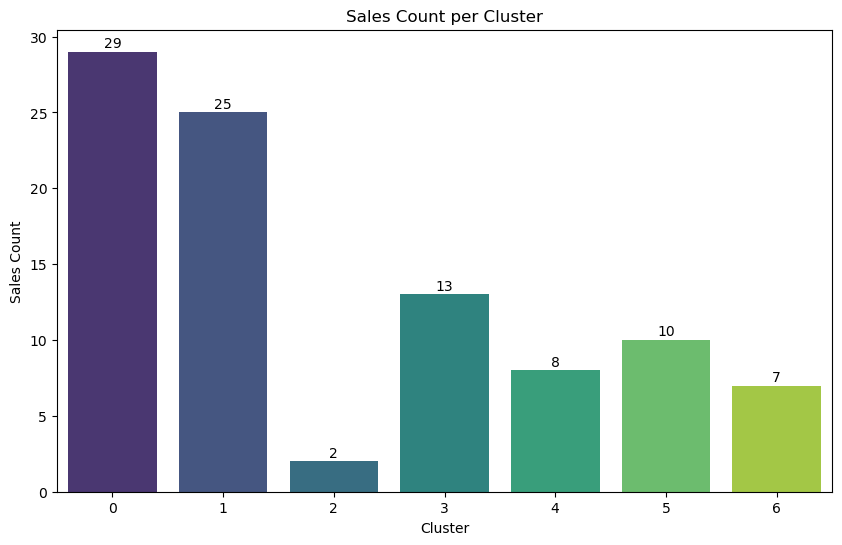

In [72]:
# Plot barplot untuk sales count per cluster
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=sales_count_per_cluster, x='cluster', y='sales_count', palette='viridis')

# Menambahkan judul dan label
plt.title('Sales Count per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Sales Count')

# add numerical
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width()/  2.0, p.get_height()),
                textcoords='offset points', xytext=(0,3),
                ha='center', fontsize=10, color='black')

# Tampilkan plot
plt.show()

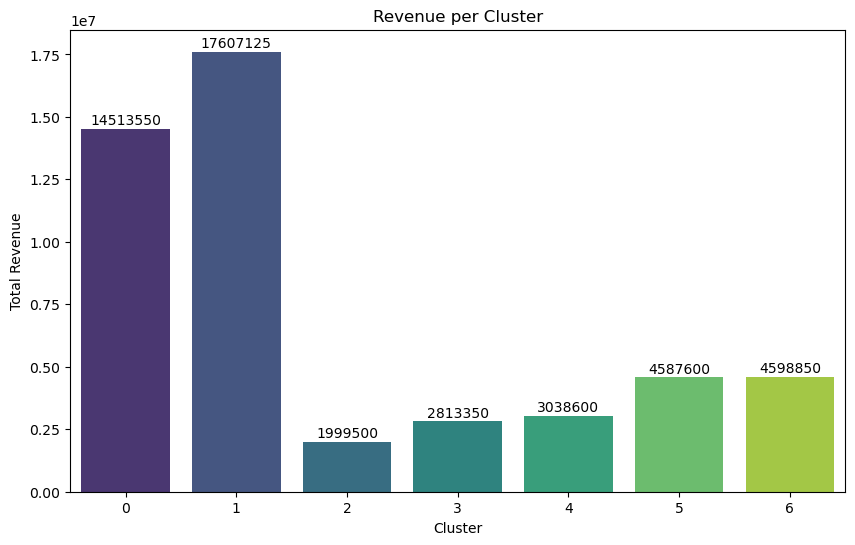

In [73]:
# Menghitung total revenue per cluster
revenue_per_cluster = df_ogc_copy.groupby('cluster')['price'].sum().reset_index(name='revenue')

# Mengurutkan hasil dari revenue tertinggi ke terendah
revenue_per_cluster = revenue_per_cluster.sort_values(by='revenue', ascending=False)


# Plot barplot untuk revenue per cluster
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=revenue_per_cluster, x='cluster', y='revenue', palette='viridis')

# Menambahkan judul dan label
plt.title('Revenue per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Revenue')


# add numerical
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width()/  2.0, p.get_height()),
                textcoords='offset points', xytext=(0,3),
                ha='center', fontsize=10, color='black')
    
# Tampilkan plot
plt.show()


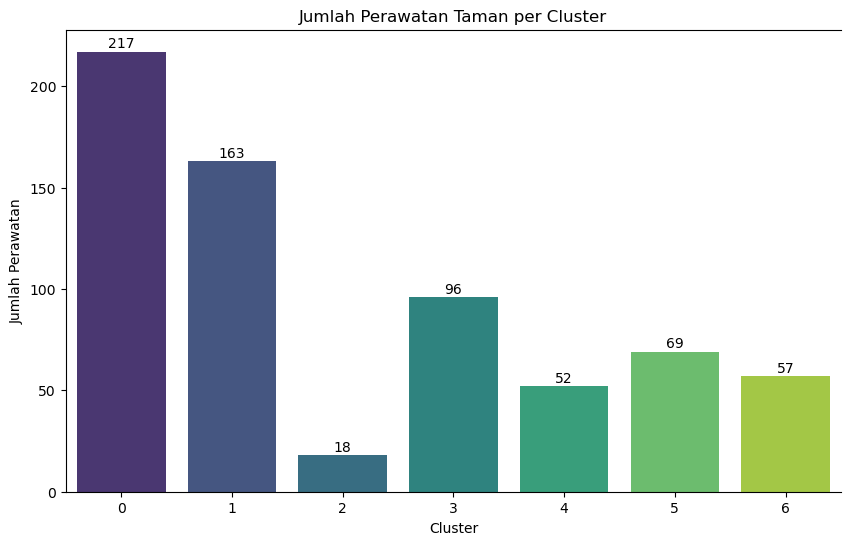

In [74]:
# visualisasi jumlah perawatan per cluster
plt.figure(figsize=(10, 6))

cluster_care_count = df_ogc_copy.groupby('cluster')['jumlah_perawatan'].sum().reset_index()
cluster_care_count = cluster_care_count.sort_values(by='jumlah_perawatan', ascending=False)

ax = sns.barplot(data=cluster_care_count, x='cluster', y='jumlah_perawatan', palette='viridis', ci=None)
sns.despine(top=False)
plt.title('Jumlah Perawatan Taman per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Perawatan')

# add numerical
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width()/  2.0, p.get_height()),
                textcoords='offset points', xytext=(0,3),
                ha='center', fontsize=10, color='black')
plt.show()

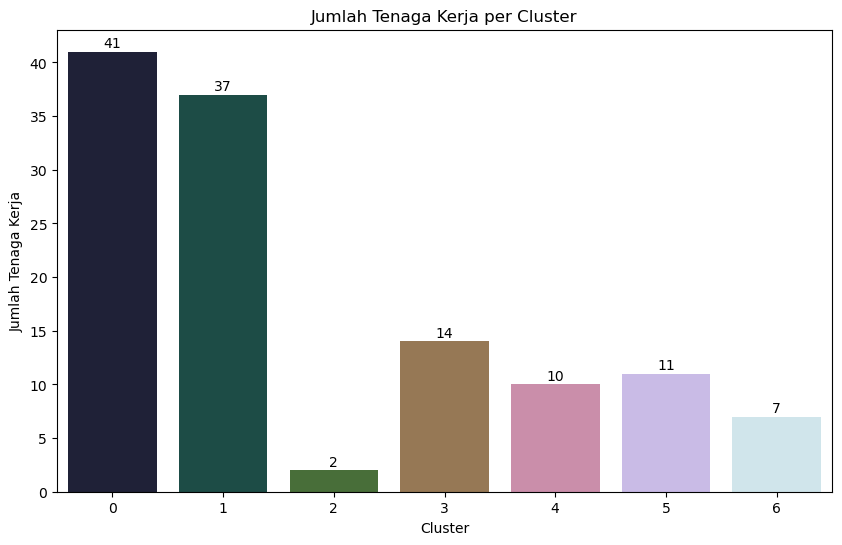

In [75]:
# visualisasi manpower per cluster
manpower_per_cluster = df_ogc_copy.groupby('cluster')['manpower_required'].sum().reset_index()
manpower_per_cluster = manpower_per_cluster.sort_values(by='manpower_required', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=manpower_per_cluster, x='cluster', y='manpower_required', palette='cubehelix')
plt.title('Jumlah Tenaga Kerja per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Tenaga Kerja')

# add numerical
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width()/  2.0, p.get_height()),
                textcoords='offset points', xytext=(0,3),
                ha='center', fontsize=10, color='black')
plt.show()


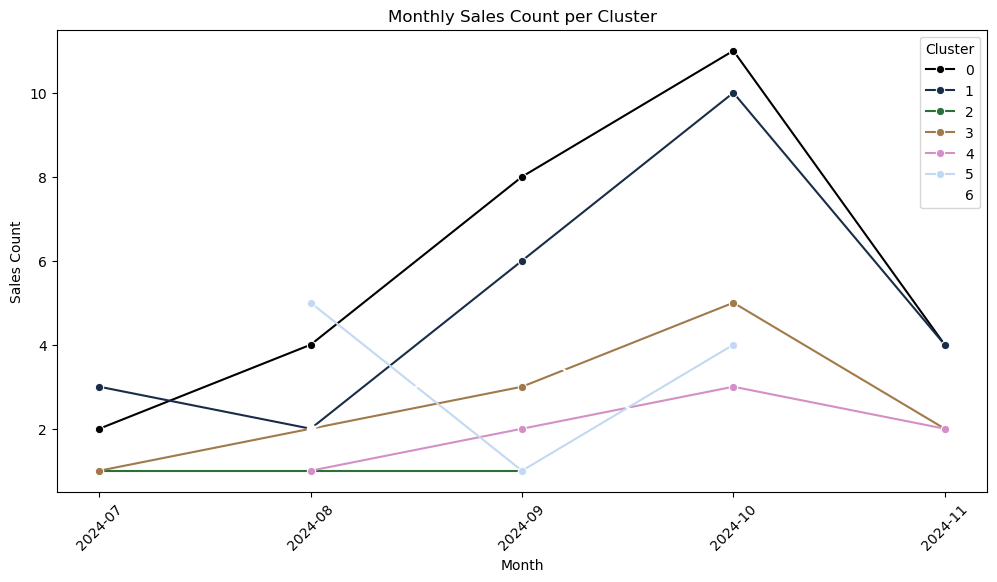

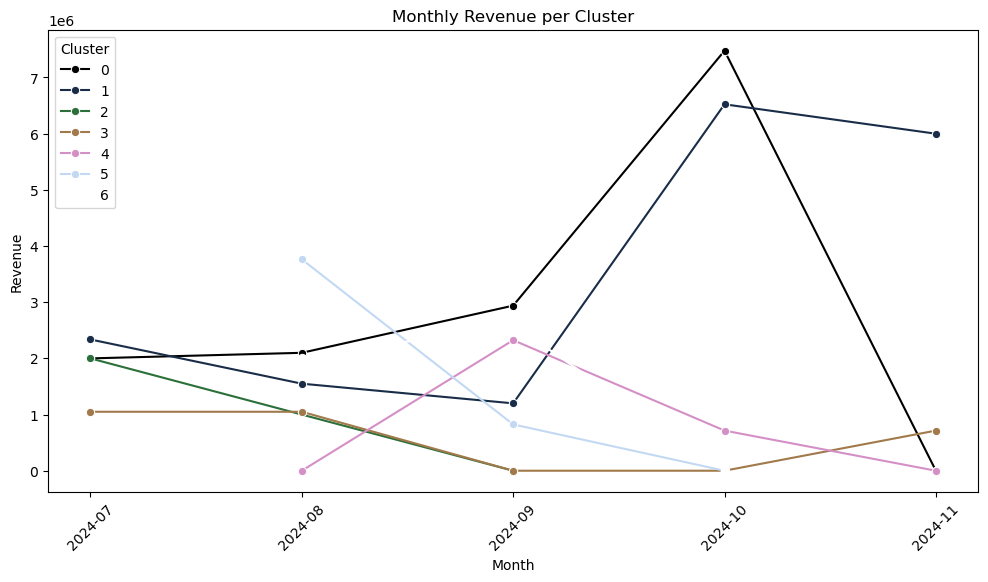

In [76]:
# Tambahkan kolom bulan
df_ogc_copy['month'] = df_ogc_copy['order_date'].dt.to_period('M').astype(str)

# Tambahkan kolom sales_count (asumsikan setiap baris adalah satu penjualan)
df_ogc_copy['sales_count'] = 1

# Hitung monthly sales count dan revenue per cluster
monthly_sales = df_ogc_copy.groupby(['cluster', 'month'])['sales_count'].sum().reset_index()
monthly_revenue = df_ogc_copy.groupby(['cluster', 'month'])['price'].sum().reset_index(name='revenue')

# Plot Monthly Sales Count per Cluster
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='month', y='sales_count', hue='cluster', marker='o', palette='cubehelix')
plt.title('Monthly Sales Count per Cluster')
plt.xlabel('Month')
plt.ylabel('Sales Count')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.show()

# Plot Monthly Revenue per Cluster
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='month', y='revenue', hue='cluster', marker='o', palette='cubehelix')
plt.title('Monthly Revenue per Cluster')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.show()

#  Analisis Order Garden Care

In [77]:
df_og_copy = df_og_clean.copy()

In [78]:
# show descriptive stats on numerical 
df_og_copy.describe().round(2).T

,count,mean,min,25%,50%,75%,max,std
id_order_garden,85.0,134.11,65.0,104.0,140.0,165.0,195.0,37.94
id_user,85.0,1333.75,670.0,1078.0,1345.0,1546.0,1865.0,260.73
id_gardener,85.0,1088.95,1085.0,1086.0,1087.0,1092.0,1114.0,4.2
size_area,85.0,12.47,1.0,5.0,10.0,12.0,70.0,12.44
lat,85.0,-6.27,-6.62,-6.32,-6.27,-6.23,-6.1,0.09
lng,85.0,106.79,106.5,106.7,106.79,106.9,107.04,0.13
order_date,85,2024-08-19 03:00:50.788235520,2024-04-23 16:05:27,2024-07-19 04:55:53,2024-08-26 05:52:44,2024-09-23 08:15:50,2024-11-01 20:20:59,NaN
cluster,85.0,2.86,0.0,2.0,3.0,4.0,5.0,1.64


In [79]:
# counts each clusters 
df_og_copy['cluster'].value_counts()

cluster
4    20
2    17
5    16
3    14
0    11
1     7
Name: count, dtype: int64

In [80]:
from IPython.display import display
import folium

# Membuat peta pusat (gunakan rata-rata koordinat untuk pusat)
center_lat = df_og_copy['lat'].mean()
center_lon = df_og_copy['lng'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

# Buat daftar warna untuk cluster
cluster_colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightblue', 'lightgreen']
color_mapping = {}  # Dictionary untuk menyimpan warna per cluster

# Loop untuk mengatur warna unik setiap cluster
unique_clusters = df_og_copy['cluster'].unique()
for i, cluster in enumerate(unique_clusters):
    color_mapping[cluster] = cluster_colors[i % len(cluster_colors)]  # Gunakan warna secara berulang jika cluster lebih banyak dari warna

# Menambahkan marker per cluster
for _, row in df_og_copy.iterrows():
    cluster = row['cluster']
    color = color_mapping.get(cluster, 'gray')  # Gunakan warna default jika cluster tidak dikenal

    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=f"Cluster: {row['cluster']}<br>Address: {row['address']}",
        icon=folium.Icon(color=color)
    ).add_to(m)

# Menampilkan peta di notebook
display(m)


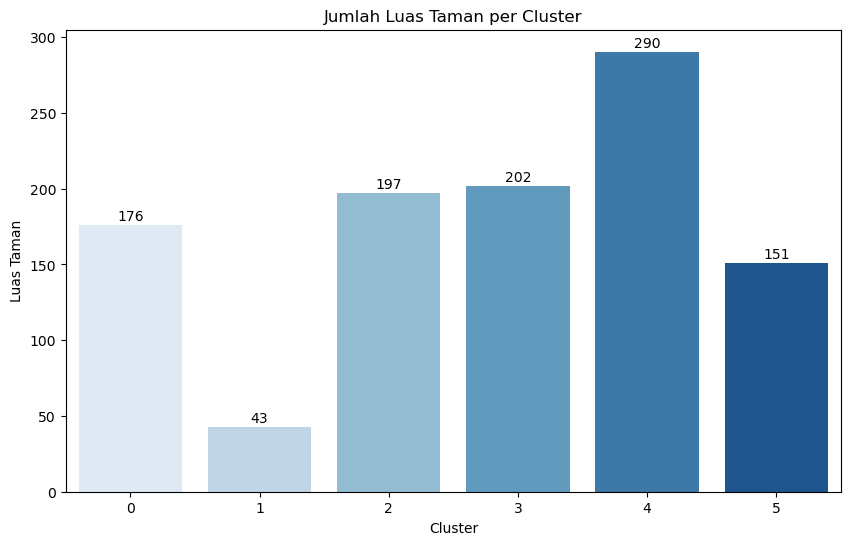

In [81]:
# Luas Taman yang Banyak Dipesan Berdasarkan Cluster

garden_size_per_cluster = df_og_copy.groupby('cluster')['size_area'].sum().reset_index()
garden_size_per_cluster = garden_size_per_cluster.sort_values(by='size_area', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=garden_size_per_cluster, x='cluster', y='size_area', palette='Blues')
plt.title('Jumlah Luas Taman per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Luas Taman')

# add numerical
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width()/  2.0, p.get_height()),
                textcoords='offset points', xytext=(0,3),
                ha='center', fontsize=10, color='black')
plt.show()

# Analisis Order Garden Design

In [82]:
df_od_copy = df_od_clean.copy()

In [83]:
from IPython.display import display
import folium

# Membuat peta pusat (gunakan rata-rata koordinat untuk pusat)
center_lat = df_od_copy['lat'].mean()
center_lon = df_od_copy['lng'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

# Buat daftar warna untuk cluster
cluster_colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightblue', 'lightgreen']
color_mapping = {}  # Dictionary untuk menyimpan warna per cluster

# Loop untuk mengatur warna unik setiap cluster
unique_clusters = df_od_copy['cluster'].unique()
for i, cluster in enumerate(unique_clusters):
    color_mapping[cluster] = cluster_colors[i % len(cluster_colors)]  # Gunakan warna secara berulang jika cluster lebih banyak dari warna

# Menambahkan marker per cluster
for _, row in df_od_copy.iterrows():
    cluster = row['cluster']
    color = color_mapping.get(cluster, 'gray')  # Gunakan warna default jika cluster tidak dikenal

    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=f"Cluster: {row['cluster']}<br>Address: {row['address']}",
        icon=folium.Icon(color=color)
    ).add_to(m)

# Menampilkan peta di notebook
display(m)


# Mengelompokan berdasarkan jarak yang saling berdekatan

## Order Garden Care 

In [84]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from geopy.distance import geodesic
import folium

# Dataframe Contoh (df_ogc_copy harus tersedia)
data_ogc = pd.DataFrame(df_ogc_copy)

# Variabel Fitur
X = data_ogc[['lat', 'lng']]

# Model KNN
knn = NearestNeighbors(n_neighbors=3, metric='euclidean')
knn.fit(X)

# Mendapatkan 3 tetangga terdekat
distances, indices = knn.kneighbors(X)

# Tentukan jarak maksimum (misalnya 100 meter)
max_distance = 10000  # dalam meter

# Fungsi untuk menghitung jarak antar dua titik (menggunakan geopy)
def calculate_distance(lat1, lng1, lat2, lng2):
    return geodesic((lat1, lng1), (lat2, lng2)).meters  # Menghitung jarak dalam meter

# Menambahkan neighbors dan jarak ke tabel
data_ogc['neighbors'] = [
    data_ogc['id'].iloc[neighbors].values.tolist() for neighbors in indices
]

# Menambahkan kolom jarak
data_ogc['neighbor_distances'] = [
    [distances[i][j] for j in range(len(distances[i]))] for i in range(len(distances))
]

# Menentukan tetangga yang berada dalam jarak maksimum
valid_neighbors_list = []
valid_distances_list = []

for i, row in data_ogc.iterrows():
    valid_neighbors = []
    valid_distances = []
    for j, neighbor_id in enumerate(row['neighbors']):
        # Mendapatkan data untuk neighbor
        neighbor_row = data_ogc[data_ogc['id'] == neighbor_id]
        if not neighbor_row.empty:
            neighbor_lat = neighbor_row.iloc[0]['lat']
            neighbor_lng = neighbor_row.iloc[0]['lng']
            
            # Menghitung jarak antar titik
            distance = calculate_distance(row['lat'], row['lng'], neighbor_lat, neighbor_lng)
            
            # Memeriksa apakah jarak dalam batas yang ditentukan
            if distance <= max_distance:
                valid_neighbors.append(neighbor_id)
                valid_distances.append(distance)
    
    # Menambahkan valid_neighbors dan valid_distances ke list
    valid_neighbors_list.append(valid_neighbors)
    valid_distances_list.append(valid_distances)

# Menambahkan valid_neighbors dan valid_distances ke DataFrame
data_ogc['valid_neighbors'] = valid_neighbors_list
data_ogc['valid_distances'] = valid_distances_list

# lihat data 
data_ogc



,id,id_order_garden_care,status,id_user,price,jumlah_perawatan,manpower_required,address,lat,lng,order_date,cluster,month,sales_count,neighbors,neighbor_distances,valid_neighbors,valid_distances
0,105,28,paid,1186,0.0,3,1,Semanggi,-6.22111,106.814,2024-07-02 10:18:44,0,2024-07,1,"[105, 1369, 1273]","[0.0, 0.0, 0.015208800084153184]","[105, 1369, 1273]","[0.0, 0.0, 1682.3251674120347]"
1,598,88,paid,1268,0.0,12,2,"Jl Palem VI/35, Petukangan Utara, Jakarta Selatan",-6.22585,106.757,2024-07-04 11:54:30,1,2024-07,1,"[598, 1031, 757]","[0.0, 0.00932952303176105, 0.00932952303176105]","[598, 1031, 757]","[0.0, 1032.2791218934954, 1032.2791218934954]"
2,626,103,paid,1329,1049500.0,6,1,"Jl. Canary Timur 2 No. 3 (The Springs, Cluster...",-6.26852,106.642,2024-07-25 14:33:54,3,2024-07,1,"[626, 872, 897]","[0.0, 0.01826407402525223, 0.020780204522571247]","[626, 872, 897]","[0.0, 2020.2576762257936, 2298.453920721123]"
3,632,104,paid,1353,1999500.0,12,1,Perumahan Graha Mirai Cluster Hikari Blok H No...,-6.38129,107.117,2024-07-26 09:17:45,2,2024-07,1,"[632, 951, 930]","[0.0, 0.07608562610637913, 0.1282342391875163]","[632, 951]","[0.0, 8417.422269058583]"
4,648,105,paid,1356,1549500.0,6,2,"Jl Cisanggiri III No.18\r\nKebayoran Baru, Jak...",-6.24165,106.813,2024-07-27 14:07:02,1,2024-07,1,"[648, 1273, 1244]","[0.0, 0.011513400887658266, 0.013483931177521582]","[648, 1273, 1244]","[0.0, 1273.667620124709, 1492.108136461525]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1424,278,paid,1349,0.0,1,1,Nama Klien: Ruben onsu/ Sarwendah\nAlamat : Jl...,-6.28399,106.799,2024-11-10 17:25:39,1,2024-11,1,"[1424, 1371, 1293]","[0.0, 0.006942398720904156, 0.008703614191813222]","[1424, 1371, 1293]","[0.0, 767.7528038757646, 962.6371242176327]"
97,1426,279,paid,1349,0.0,12,1,DKI Jakarta,-6.19445,106.823,2024-11-10 17:30:09,0,2024-11,1,"[1426, 925, 1226]","[0.0, 0.007777666745243527, 0.010581663385314499]","[1426, 925, 1226]","[0.0, 860.6585918928907, 1171.0120964421687]"
98,1449,287,paid,1937,0.0,12,1,"alia residence, jln. alia 6 no. 22 Jatimelati ...",-6.31348,106.937,2024-11-12 11:22:32,4,2024-11,1,"[1449, 1062, 1366]","[0.0, 0.011200000000000543, 0.01423435632544802]","[1449, 1062, 1366]","[0.0, 1238.5820249024378, 1574.5816645366801]"
99,1473,289,paid,1451,0.0,6,1,Cluster nara village Jalan boulevard no.17,-6.16404,106.903,2024-11-12 14:25:56,0,2024-11,1,"[1473, 1207, 1101]","[0.0, 0.030265823960373684, 0.0354039545813749]","[1473, 1207, 1101]","[0.0, 3349.4514521017554, 3917.5375652881694]"


In [85]:
# Visualization
# Buat Peta Folium
center_lat = data_ogc['lat'].mean()
center_lng = data_ogc['lng'].mean()
mymap = folium.Map(location=[center_lat, center_lng], zoom_start=15)

cluster_colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightblue', 'lightgreen']
color_mapping = {}  # Dictionary untuk menyimpan warna per cluster

# Loop untuk mengatur warna unik setiap cluster
unique_clusters = df_ogc_copy['cluster'].unique()
for i, cluster in enumerate(unique_clusters):
    color_mapping[cluster] = cluster_colors[i % len(cluster_colors)]  # Gunakan warna secara berulang jika cluster lebih banyak dari warna

# Menambahkan marker untuk setiap titik
for index, row in data_ogc.iterrows():
    cluster = row['cluster']
    color = color_mapping.get(cluster, 'gray')  # Gunakan warna default jika cluster tidak dikenal
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=f"ID: {row['id']}<br>Neighbors: {row['valid_neighbors']}<br>Address: {row['address']}",
        icon=folium.Icon(color=color)  # Warna marker bisa disesuaikan
    ).add_to(mymap)

# Menambahkan garis yang menghubungkan titik-titik yang berdekatan (valid_neighbors)
for index, row in data_ogc.iterrows():
    for neighbor_id, distance in zip(row['valid_neighbors'], row['valid_distances']):
        # Cari data neighbor berdasarkan ID
        neighbor_row = data_ogc[data_ogc['id'] == neighbor_id]
        if not neighbor_row.empty:
            neighbor_lat = neighbor_row.iloc[0]['lat']
            neighbor_lng = neighbor_row.iloc[0]['lng']
            
            # Tambahkan garis yang menghubungkan titik ini dengan tetangganya
            folium.PolyLine(
                locations=[[row['lat'], row['lng']], [neighbor_lat, neighbor_lng]],
                color='blue',  # Warna garis bisa disesuaikan
                weight=2.5,
                opacity=0.7
            ).add_to(mymap)



# Tampilkan hasil
mymap

## Order Garden

In [86]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from geopy.distance import geodesic
import folium

# Dataframe Contoh (df_ogc_copy harus tersedia)
data_og = pd.DataFrame(df_og_copy)

# Variabel Fitur
X = data_og[['lat', 'lng']]

# Model KNN
knn = NearestNeighbors(n_neighbors=3, metric='euclidean')
knn.fit(X)

# Mendapatkan 3 tetangga terdekat
distances, indices = knn.kneighbors(X)

# Tentukan jarak maksimum (misalnya 100 meter)
max_distance = 7000  # dalam meter

# Fungsi untuk menghitung jarak antar dua titik (menggunakan geopy)
def calculate_distance(lat1, lng1, lat2, lng2):
    return geodesic((lat1, lng1), (lat2, lng2)).meters  # Menghitung jarak dalam meter

# Menambahkan neighbors dan jarak ke tabel
data_og['neighbors'] = [
    data_og['id_order_garden'].iloc[neighbors].values.tolist() for neighbors in indices
]

# Menambahkan kolom jarak
data_og['neighbor_distances'] = [
    [distances[i][j] for j in range(len(distances[i]))] for i in range(len(distances))
]

# Menentukan tetangga yang berada dalam jarak maksimum
valid_neighbors_list = []
valid_distances_list = []

for i, row in data_og.iterrows():
    valid_neighbors = []
    valid_distances = []
    for j, neighbor_id in enumerate(row['neighbors']):
        # Mendapatkan data untuk neighbor
        neighbor_row = data_og[data_og['id_order_garden'] == neighbor_id]
        if not neighbor_row.empty:
            neighbor_lat = neighbor_row.iloc[0]['lat']
            neighbor_lng = neighbor_row.iloc[0]['lng']
            
            # Menghitung jarak antar titik
            distance = calculate_distance(row['lat'], row['lng'], neighbor_lat, neighbor_lng)
            
            # Memeriksa apakah jarak dalam batas yang ditentukan
            if distance <= max_distance:
                valid_neighbors.append(neighbor_id)
                valid_distances.append(distance)
    
    # Menambahkan valid_neighbors dan valid_distances ke list
    valid_neighbors_list.append(valid_neighbors)
    valid_distances_list.append(valid_distances)

# Menambahkan valid_neighbors dan valid_distances ke DataFrame
data_og['valid_neighbors'] = valid_neighbors_list
data_og['valid_distances'] = valid_distances_list

data_og

,id_order_garden,id_user,id_gardener,status_garden,size_area,address,lat,lng,order_date,cluster,neighbors,neighbor_distances,valid_neighbors,valid_distances
0,65,927,1087.0,in_review,11.0,Jl. Ujung Gedong RT 002 RW 012 no.69 Kel. Gedo...,-6.29776,106.862,2024-04-23 16:05:27,5,"[65, 116, 183]","[0.0, 0.021464240028476186, 0.02914463243891996]","[65, 116, 183]","[0.0, 2375.0149611740835, 3223.6245242871646]"
1,66,926,1093.0,in_review,28.0,"Mahagoni Park Bintaro Blok B1 No 50, Perigi Ba...",-6.26076,106.690,2024-04-27 12:19:36,4,"[66, 81, 104]","[0.0, 0.008526576100635307, 0.021270270332086356]","[66, 81, 104]","[0.0, 943.4743886329433, 2353.721237571324]"
2,70,925,1085.0,finish,35.0,"Premier Terrace Blok M3, Jalan Raya Ciracas, C...",-6.32984,106.876,2024-05-16 17:59:26,5,"[70, 74, 65]","[0.0, 0.03386704740599568, 0.03500180566771175]","[70, 74, 65]","[0.0, 3745.309286065119, 3871.1113548546737]"
3,72,1024,1087.0,finish,2.0,"Bekasi, Kota Bekasi, Jawa Barat",-6.23827,106.976,2024-05-24 06:24:44,5,"[72, 123, 111]","[0.0, 0.0, 0.017669773626167787]","[72, 123, 111]","[0.0, 0.0, 1954.695088865319]"
4,74,1052,1087.0,finish,5.0,"Wakay Residences, no A7, Jl. Abdulrahman, RT.1...",-6.36347,106.880,2024-06-12 08:40:53,2,"[74, 92, 171]","[0.0, 0.015778517040583907, 0.025098334606096888]","[74, 92, 171]","[0.0, 1745.1645581186592, 2776.517031211267]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,190,1707,1093.0,finish,16.0,"Serenia Hills, Jl. Venture Barat no 32, Tanger...",-6.25542,106.724,2024-10-28 07:35:51,4,"[190, 160, 81]","[0.0, 0.020955801106129792, 0.027289633562958274]","[190, 160, 81]","[0.0, 2318.7333393227677, 3019.693818568266]"
87,191,1607,1093.0,finish,8.0,cluster Alicante Granada blok ABB no.27 Gading...,-6.29943,106.668,2024-10-28 07:37:28,4,"[191, 182, 168]","[0.0, 0.014528320618709824, 0.014866068747321977]","[191, 182, 168]","[0.0, 1606.6704481291497, 1644.1093577437396]"
88,192,1727,1092.0,acc_gardener,8.0,"Jl. Darmawangsa X No. 69A, Kebayoran Baru, Jak...",-6.25731,106.804,2024-10-28 17:04:03,3,"[194, 192, 154]","[0.0, 0.0, 0.03190235101054779]","[194, 192, 154]","[0.0, 0.0, 3528.609886146801]"
89,194,1727,1092.0,finish,10.0,"Jl. Darmawangsa X No. 69A, Kebayoran Baru, Jak...",-6.25731,106.804,2024-11-01 20:08:05,3,"[194, 192, 154]","[0.0, 0.0, 0.03190235101054779]","[194, 192, 154]","[0.0, 0.0, 3528.609886146801]"


In [87]:
# Visualization
# Buat Peta Folium
center_lat = data_og['lat'].mean()
center_lng = data_og['lng'].mean()
mymap = folium.Map(location=[center_lat, center_lng], zoom_start=15)

cluster_colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightblue', 'lightgreen']
color_mapping = {}  # Dictionary untuk menyimpan warna per cluster

# Loop untuk mengatur warna unik setiap cluster
unique_clusters = data_og['cluster'].unique()
for i, cluster in enumerate(unique_clusters):
    color_mapping[cluster] = cluster_colors[i % len(cluster_colors)]  # Gunakan warna secara berulang jika cluster lebih banyak dari warna

# Menambahkan marker untuk setiap titik
for index, row in data_og.iterrows():
    cluster = row['cluster']
    color = color_mapping.get(cluster, 'gray')  # Gunakan warna default jika cluster tidak dikenal
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=f"ID: {row['id_order_garden']}<br>Neighbors: {row['valid_neighbors']}<br>Address: {row['address']}",
        icon=folium.Icon(color=color)  # Warna marker bisa disesuaikan
    ).add_to(mymap)

# Menambahkan garis yang menghubungkan titik-titik yang berdekatan (valid_neighbors)
for index, row in data_og.iterrows():
    for neighbor_id, distance in zip(row['valid_neighbors'], row['valid_distances']):
        # Cari data neighbor berdasarkan ID
        neighbor_row = data_og[data_og['id_order_garden'] == neighbor_id]
        if not neighbor_row.empty:
            neighbor_lat = neighbor_row.iloc[0]['lat']
            neighbor_lng = neighbor_row.iloc[0]['lng']
            
            # Tambahkan garis yang menghubungkan titik ini dengan tetangganya
            folium.PolyLine(
                locations=[[row['lat'], row['lng']], [neighbor_lat, neighbor_lng]],
                color='blue',  # Warna garis bisa disesuaikan
                weight=2.5,
                opacity=0.7
            ).add_to(mymap)



# Tampilkan hasil
mymap

# Order Design

In [88]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from geopy.distance import geodesic
import folium

# Dataframe Contoh (df_ogc_copy harus tersedia)
data_od = pd.DataFrame(df_od_copy)

# Variabel Fitur
X = data_od[['lat', 'lng']]

# Model KNN
knn = NearestNeighbors(n_neighbors=3, metric='euclidean')
knn.fit(X)

# Mendapatkan 3 tetangga terdekat
distances, indices = knn.kneighbors(X)

# Tentukan jarak maksimum (misalnya 100 meter)
max_distance = 5000  # dalam meter

# Fungsi untuk menghitung jarak antar dua titik (menggunakan geopy)
def calculate_distance(lat1, lng1, lat2, lng2):
    return geodesic((lat1, lng1), (lat2, lng2)).meters  # Menghitung jarak dalam meter

# Menambahkan neighbors dan jarak ke tabel
data_od['neighbors'] = [
    data_od['id_order_design'].iloc[neighbors].values.tolist() for neighbors in indices
]

# Menambahkan kolom jarak
data_od['neighbor_distances'] = [
    [distances[i][j] for j in range(len(distances[i]))] for i in range(len(distances))
]

# Menentukan tetangga yang berada dalam jarak maksimum
valid_neighbors_list = []
valid_distances_list = []

for i, row in data_od.iterrows():
    valid_neighbors = []
    valid_distances = []
    for j, neighbor_id in enumerate(row['neighbors']):
        # Mendapatkan data untuk neighbor
        neighbor_row = data_od[data_od['id_order_design'] == neighbor_id]
        if not neighbor_row.empty:
            neighbor_lat = neighbor_row.iloc[0]['lat']
            neighbor_lng = neighbor_row.iloc[0]['lng']
            
            # Menghitung jarak antar titik
            distance = calculate_distance(row['lat'], row['lng'], neighbor_lat, neighbor_lng)
            
            # Memeriksa apakah jarak dalam batas yang ditentukan
            if distance <= max_distance:
                valid_neighbors.append(neighbor_id)
                valid_distances.append(distance)
    
    # Menambahkan valid_neighbors dan valid_distances ke list
    valid_neighbors_list.append(valid_neighbors)
    valid_distances_list.append(valid_distances)

# Menambahkan valid_neighbors dan valid_distances ke DataFrame
data_od['valid_neighbors'] = valid_neighbors_list
data_od['valid_distances'] = valid_distances_list

data_od

,id_order_design,id_user,id_designer,status_design,address,lat,lng,order_date,cluster,neighbors,neighbor_distances,valid_neighbors,valid_distances
0,568,921,949.0,in_review,"Emerald View, Jln. Emerald Citra V, Blok D no....",-6.28352,106.7110,2024-04-20 15:28:15,0,"[674, 568, 641]","[0.0, 0.0, 0.0]","[674, 568, 641]","[0.0, 0.0, 0.0]"
1,569,923,950.0,in_review,"Perumahan Jatinegara Indah, Jl Lawu Ujung Blok...",-6.19922,106.9270,2024-04-21 10:30:22,0,"[569, 663, 839]","[0.0, 0.029463088772227138, 0.03904377543219883]","[569, 663, 839]","[0.0, 3258.7180589049435, 4317.821106738846]"
2,570,925,943.0,finish,"Premier Terrace Blok M3, Jalan Raya Ciracas, C...",-6.32984,106.8760,2024-04-21 16:00:33,0,"[570, 636, 572]","[0.0, 0.03386704740599568, 0.03500180566771175]","[570, 636, 572]","[0.0, 3745.309286065119, 3871.1113548546737]"
3,571,926,946.0,in_review,"Mahagoni Park Bintaro Blok B1 No 50, Perigi Ba...",-6.26076,106.6900,2024-04-22 10:25:36,0,"[571, 865, 646]","[0.0, 0.00457192519623849, 0.008526576100635307]","[571, 865, 646]","[0.0, 505.73972627959273, 943.4743886329433]"
4,572,927,928.0,finish,Jl. Ujung Gedong RT 002 RW 012 no.69 Kel. Gedo...,-6.29776,106.8620,2024-04-22 11:41:42,0,"[572, 608, 650]","[0.0, 0.02196235187770273, 0.028981897798445348]","[572, 608, 650]","[0.0, 2430.073915048433, 3206.8064940288273]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,911,1681,931.0,in_review_internal,Bumi Cimanggi Indah Blok A6 no.20 kel.sukatani...,-6.38782,106.8760,2024-09-18 16:10:26,0,"[911, 633, 824]","[0.0, 0.017283868201295585, 0.021784235125430148]","[911, 633, 824]","[0.0, 1911.839979885359, 2409.763253329865]"
225,912,1641,1301.0,in_review,"BSD City Cluster Sevilla CB17 Serpong, Tangsel...",-6.31722,106.6920,2024-09-19 10:38:36,0,"[912, 585, 604]","[0.0, 0.0, 0.006415637146854094]","[912, 585, 604]","[0.0, 0.0, 709.7273845895988]"
226,914,1686,982.0,finish,"Jl. Rambutan No.12A CONDET, Kel. Cililitan, Ke...",-6.25960,106.8690,2024-09-21 09:44:30,0,"[914, 647, 882]","[0.0, 0.017812007186167846, 0.02682237871628497]","[914, 647, 882]","[0.0, 1970.2017314391426, 2967.625455332552]"
227,915,1485,948.0,on_going,"Madirsan,tanjung Morawa, Kabupaten Deli Serdan...",3.53093,98.7633,2024-09-21 16:23:20,1,"[918, 915, 809]","[0.0, 0.0, 0.044510139294321904]","[918, 915, 809]","[0.0, 0.0, 4945.4947991578065]"


In [89]:
# Visualization
# Buat Peta Folium
center_lat = data_od['lat'].mean()
center_lng = data_od['lng'].mean()
mymap = folium.Map(location=[center_lat, center_lng], zoom_start=15)

cluster_colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightblue', 'lightgreen']
color_mapping = {}  # Dictionary untuk menyimpan warna per cluster

# Loop untuk mengatur warna unik setiap cluster
unique_clusters = data_od['cluster'].unique()
for i, cluster in enumerate(unique_clusters):
    color_mapping[cluster] = cluster_colors[i % len(cluster_colors)]  # Gunakan warna secara berulang jika cluster lebih banyak dari warna

# Menambahkan marker untuk setiap titik
for index, row in data_od.iterrows():
    cluster = row['cluster']
    color = color_mapping.get(cluster, 'gray')  # Gunakan warna default jika cluster tidak dikenal
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=f"ID: {row['id_order_design']}<br>Neighbors: {row['valid_neighbors']}<br>Address: {row['address']}",
        icon=folium.Icon(color=color)  # Warna marker bisa disesuaikan
    ).add_to(mymap)

# Menambahkan garis yang menghubungkan titik-titik yang berdekatan (valid_neighbors)
for index, row in data_od.iterrows():
    for neighbor_id, distance in zip(row['valid_neighbors'], row['valid_distances']):
        # Cari data neighbor berdasarkan ID
        neighbor_row = data_od[data_od['id_order_design'] == neighbor_id]
        if not neighbor_row.empty:
            neighbor_lat = neighbor_row.iloc[0]['lat']
            neighbor_lng = neighbor_row.iloc[0]['lng']
            
            # Tambahkan garis yang menghubungkan titik ini dengan tetangganya
            folium.PolyLine(
                locations=[[row['lat'], row['lng']], [neighbor_lat, neighbor_lng]],
                color='blue',  # Warna garis bisa disesuaikan
                weight=2.5,
                opacity=0.7
            ).add_to(mymap)



# Tampilkan hasil
mymap

In [90]:
# data_ogc.to_csv("garden_care_clustering.csv", index = False )

In [91]:
# data_og.to_csv("order_garden_clustering.csv", index = False )

In [92]:
# data_od = data_od.drop(columns=["neighbor_distances"])

In [93]:
# data_od.to_csv("order_design_clustering.csv", index = False )